In [8]:
from matplotlib import pyplot as plt

In [54]:
from collections import namedtuple, defaultdict
#intersection-schedule:
IS = namedtuple("IS", ['id', 'schedule'])
Street = namedtuple("Street", ['start', 'end', 'name', 'duration', 'id'])

def get_inputs(example):
    filename = 'data/{}.txt'.format(example)
    f = open(filename)
    input = lambda: next(f)

    Intersection = namedtuple("Intersection", ["incoming"])
    D, I, S, V, F = map(int, input().split())
    streets = []
    street_name_to_street_id = dict()
    intersections = [Intersection(incoming=defaultdict(int)) for i in range(I)]
    for i in range(S):
        s, e, n, d = input().split()
        streets.append(Street(int(s), int(e), n, int(d), i))
        intersections[int(e)].incoming[i] += 1
        street_name_to_street_id[n] = i
    cars = []
    for i in range(V):
        inp = input().split()
        path = inp[1:]
        cars.append([street_name_to_street_id[x] for x in path])
    return D,I,S,V,F, streets, cars, intersections

def intersections_of_path(street_ids):
    return [streets[sid].end for sid in street_ids]

def print_schedule(schedule):
    print(len(schedule))
    for inter in schedule:
        print(inter.id)
        print(len(inter.schedule))
        for street_id, duration in inter.schedule:
            print(streets[street_id].name, duration)

In [55]:
def print_metrics(example):
    print('{}-------------------------------------------'.format(example))
    D,I,S,V,F,streets, cars, intersections = get_inputs(example)
    print('duration: {}, intersections: {}, streets: {}, cars: {}, F: {}'.format(D, I, S, V, F))
    data = []
    for intersection in intersections:
        data.append(sum(x for x in intersection.incoming.values()))
    plt.hist(data)
    plt.title('histogram: intersection busyness -- {}'.format(example))
    plt.show()
    plt.hist(data)
    plt.title('histogram: intersection busyness -- {}'.format(example))
    plt.yscale('log')
    plt.show()
    print('min:', min(data), 'max', max(data))
    print()

b-------------------------------------------
duration: 5070, intersections: 7073, streets: 9102, cars: 1000, F: 1000


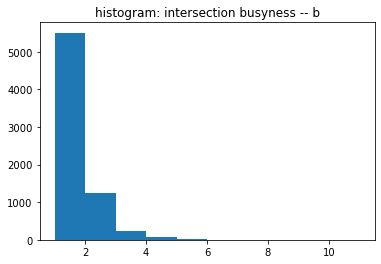

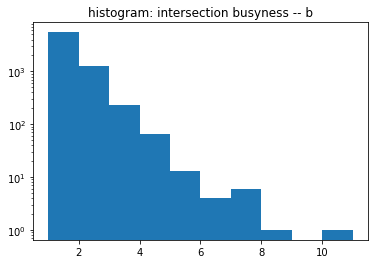

min: 1 max 11

c-------------------------------------------
duration: 1640, intersections: 10000, streets: 35030, cars: 1000, F: 100


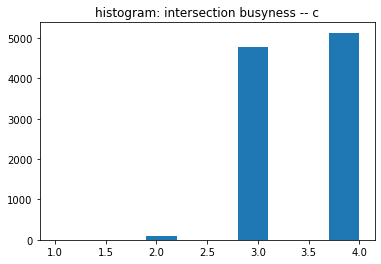

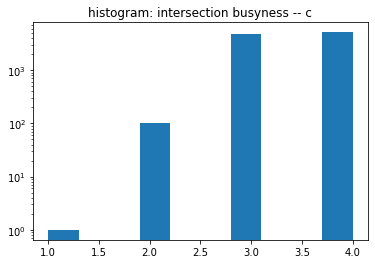

min: 1 max 4

d-------------------------------------------
duration: 8071, intersections: 8000, streets: 95928, cars: 1000, F: 1000


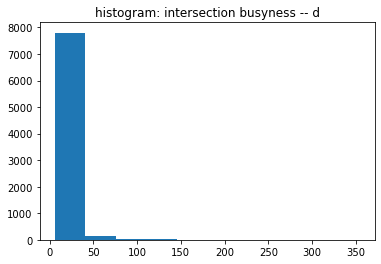

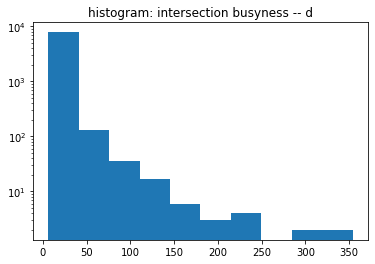

min: 6 max 354

e-------------------------------------------
duration: 676, intersections: 500, streets: 998, cars: 1000, F: 500


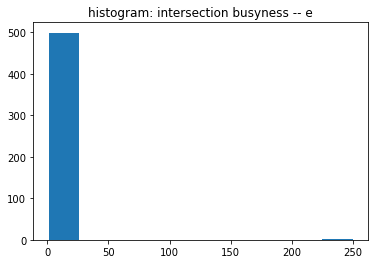

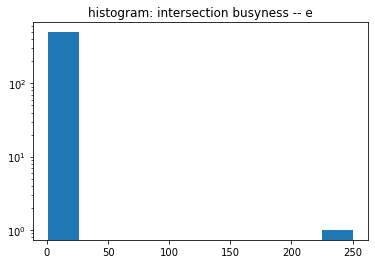

min: 1 max 250

f-------------------------------------------
duration: 1992, intersections: 1662, streets: 10000, cars: 1000, F: 500


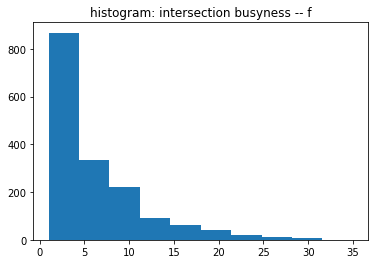

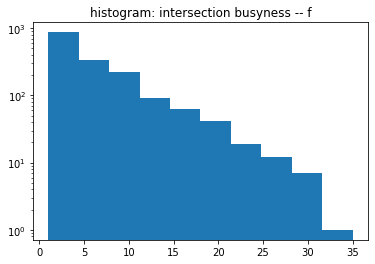

min: 1 max 35



In [56]:
for example in 'bcdef':
    print_metrics(example)

# E etiole

In [58]:
D,I,S,V,F,streets, cars, intersections = get_inputs('e')

In [59]:
intersections[0]

Intersection(incoming=defaultdict(<class 'int'>, {996: 1}))

In [60]:
intersections[1]

Intersection(incoming=defaultdict(<class 'int'>, {0: 1, 3: 1}))

In [61]:
intersections[2]

Intersection(incoming=defaultdict(<class 'int'>, {2: 1}))

In [62]:
intersections[3]

Intersection(incoming=defaultdict(<class 'int'>, {4: 1, 7: 1}))

In [63]:
max(intersections, key=lambda i: sum(i.incoming.values()))

Intersection(incoming=defaultdict(<class 'int'>, {1: 1, 5: 1, 9: 1, 13: 1, 17: 1, 21: 1, 25: 1, 29: 1, 33: 1, 37: 1, 41: 1, 45: 1, 49: 1, 53: 1, 57: 1, 61: 1, 65: 1, 69: 1, 73: 1, 77: 1, 81: 1, 85: 1, 89: 1, 93: 1, 97: 1, 101: 1, 105: 1, 109: 1, 113: 1, 117: 1, 121: 1, 125: 1, 129: 1, 133: 1, 137: 1, 141: 1, 145: 1, 149: 1, 153: 1, 157: 1, 161: 1, 165: 1, 169: 1, 173: 1, 177: 1, 181: 1, 185: 1, 189: 1, 193: 1, 197: 1, 201: 1, 205: 1, 209: 1, 213: 1, 217: 1, 221: 1, 225: 1, 229: 1, 233: 1, 237: 1, 241: 1, 245: 1, 249: 1, 253: 1, 257: 1, 261: 1, 265: 1, 269: 1, 273: 1, 277: 1, 281: 1, 285: 1, 289: 1, 293: 1, 297: 1, 301: 1, 305: 1, 309: 1, 313: 1, 317: 1, 321: 1, 325: 1, 329: 1, 333: 1, 337: 1, 341: 1, 345: 1, 349: 1, 353: 1, 357: 1, 361: 1, 365: 1, 369: 1, 373: 1, 377: 1, 381: 1, 385: 1, 389: 1, 393: 1, 397: 1, 401: 1, 405: 1, 409: 1, 413: 1, 417: 1, 421: 1, 425: 1, 429: 1, 433: 1, 437: 1, 441: 1, 445: 1, 449: 1, 453: 1, 457: 1, 461: 1, 465: 1, 469: 1, 473: 1, 477: 1, 481: 1, 485: 1, 48

In [71]:
streets[1]

Street(start=0, end=499, name='a-ejj', duration=48, id=1)

In [64]:
car_path_durations = [sum(streets[street_id].duration for street_id in car) for car in cars]

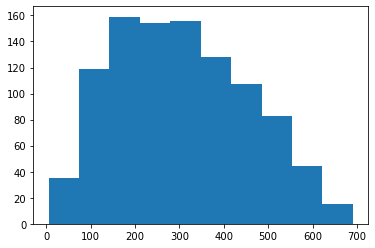

In [67]:
plt.hist(car_path_durations)
plt.show()

In [74]:
demands = []
for i,car in enumerate(cars):
    total_time = sum(streets[street_id].duration+0.8 for street_id in car)
    time = 0
    for street_id in car:
        if streets[street_id].end == 499:
            demands.append((street_id, time, total_time-time))
            break
        time += 0.8+streets[street_id].duration

In [75]:
demands

[(17, 57.599999999999994, 358.80000000000007),
 (17, 0, 480.00000000000006),
 (981, 175.39999999999998, 89.60000000000002),
 (29, 0, 165.2),
 (157, 274.2, 199.40000000000003),
 (153, 304.8, 261.2),
 (977, 70.8, 321.8),
 (341, 0, 407.8),
 (705, 404.8, 106.40000000000003),
 (929, 331.0, 279.9999999999999),
 (845, 127.39999999999999, 357.80000000000007),
 (565, 73.6, 157.4),
 (553, 112.6, 178.20000000000002),
 (265, 110.6, 451.4),
 (189, 0, 228.0),
 (661, 0, 157.2),
 (93, 391.6, 147.60000000000002),
 (729, 0, 357.6),
 (409, 0, 589.0),
 (297, 126.6, 327.6),
 (73, 72.8, 18.799999999999997),
 (53, 154.6, 140.20000000000002),
 (137, 0, 199.39999999999998),
 (689, 117.6, 207.80000000000004),
 (73, 0, 267.0),
 (501, 123.2, 346.80000000000007),
 (353, 34.8, 454.40000000000003),
 (925, 86.8, 132.39999999999998),
 (681, 0, 299.0),
 (641, 94.6, 224.20000000000002),
 (41, 0, 241.60000000000002),
 (469, 0, 287.8),
 (349, 84.39999999999999, 185.40000000000003),
 (261, 0, 425.20000000000005),
 (273, 24

In [76]:
demands.sort(key=lambda x: (x[1], -x[2]))

In [77]:
demands

[(489, 0, 698.9999999999999),
 (289, 0, 680.9999999999999),
 (73, 0, 677.1999999999999),
 (401, 0, 649.9999999999999),
 (477, 0, 620.0),
 (409, 0, 589.0),
 (569, 0, 587.0),
 (133, 0, 585.0),
 (261, 0, 583.0),
 (593, 0, 579.1999999999999),
 (333, 0, 572.4),
 (621, 0, 572.1999999999999),
 (453, 0, 565.4),
 (977, 0, 563.2),
 (493, 0, 558.6),
 (341, 0, 550.1999999999999),
 (621, 0, 549.0),
 (9, 0, 534.0),
 (269, 0, 529.0),
 (425, 0, 526.4),
 (601, 0, 525.0),
 (473, 0, 522.0),
 (645, 0, 519.4),
 (537, 0, 514.4),
 (513, 0, 513.4),
 (21, 0, 511.00000000000006),
 (297, 0, 508.20000000000005),
 (17, 0, 506.20000000000005),
 (933, 0, 506.20000000000005),
 (65, 0, 504.00000000000006),
 (845, 0, 500.40000000000003),
 (289, 0, 490.8),
 (333, 0, 490.20000000000005),
 (869, 0, 489.40000000000003),
 (37, 0, 486.6),
 (289, 0, 486.20000000000005),
 (345, 0, 485.40000000000003),
 (769, 0, 481.00000000000006),
 (189, 0, 480.20000000000005),
 (17, 0, 480.00000000000006),
 (893, 0, 472.20000000000005),
 (61

In [80]:
from collections import Counter
cc = Counter([x[0] for x in demands])

(array([44., 63., 58., 34., 20.,  3.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

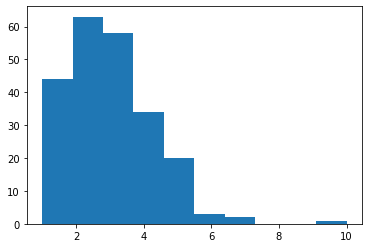

In [83]:
plt.hist(cc.values())

In [84]:
initial_demands = [(x,t,r) for x,t,r in demands if t==0]

In [85]:
initial_demands

[(489, 0, 698.9999999999999),
 (289, 0, 680.9999999999999),
 (73, 0, 677.1999999999999),
 (401, 0, 649.9999999999999),
 (477, 0, 620.0),
 (409, 0, 589.0),
 (569, 0, 587.0),
 (133, 0, 585.0),
 (261, 0, 583.0),
 (593, 0, 579.1999999999999),
 (333, 0, 572.4),
 (621, 0, 572.1999999999999),
 (453, 0, 565.4),
 (977, 0, 563.2),
 (493, 0, 558.6),
 (341, 0, 550.1999999999999),
 (621, 0, 549.0),
 (9, 0, 534.0),
 (269, 0, 529.0),
 (425, 0, 526.4),
 (601, 0, 525.0),
 (473, 0, 522.0),
 (645, 0, 519.4),
 (537, 0, 514.4),
 (513, 0, 513.4),
 (21, 0, 511.00000000000006),
 (297, 0, 508.20000000000005),
 (17, 0, 506.20000000000005),
 (933, 0, 506.20000000000005),
 (65, 0, 504.00000000000006),
 (845, 0, 500.40000000000003),
 (289, 0, 490.8),
 (333, 0, 490.20000000000005),
 (869, 0, 489.40000000000003),
 (37, 0, 486.6),
 (289, 0, 486.20000000000005),
 (345, 0, 485.40000000000003),
 (769, 0, 481.00000000000006),
 (189, 0, 480.20000000000005),
 (17, 0, 480.00000000000006),
 (893, 0, 472.20000000000005),
 (61

In [87]:
ccc = Counter(x for x,_,_ in initial_demands)

In [92]:
[(i,x) for i,x in ccc.items() if x > 1]

[(289, 3),
 (73, 2),
 (477, 3),
 (261, 2),
 (593, 3),
 (333, 4),
 (621, 5),
 (453, 4),
 (977, 2),
 (493, 2),
 (341, 3),
 (9, 2),
 (269, 2),
 (473, 4),
 (537, 2),
 (21, 2),
 (17, 4),
 (933, 2),
 (65, 2),
 (869, 2),
 (37, 2),
 (345, 2),
 (189, 2),
 (893, 2),
 (617, 2),
 (157, 2),
 (781, 2),
 (25, 3),
 (605, 2),
 (713, 3),
 (985, 3),
 (929, 2),
 (129, 3),
 (937, 2),
 (225, 2),
 (917, 2),
 (877, 2),
 (777, 2),
 (553, 2),
 (905, 2),
 (337, 2),
 (365, 5),
 (145, 2),
 (205, 5),
 (369, 2),
 (805, 2),
 (817, 2),
 (173, 2),
 (649, 2),
 (581, 2),
 (377, 2),
 (813, 3),
 (253, 3),
 (749, 2),
 (497, 2),
 (197, 2),
 (181, 2),
 (949, 2),
 (285, 3),
 (233, 2),
 (213, 2),
 (561, 2),
 (149, 4),
 (961, 2),
 (41, 3),
 (141, 3),
 (881, 2),
 (137, 2),
 (209, 2),
 (89, 2),
 (941, 2),
 (481, 2),
 (585, 3),
 (669, 2),
 (757, 2),
 (433, 2)]

In [91]:
ccc.values

Counter({489: 1,
         289: 3,
         73: 2,
         401: 1,
         477: 3,
         409: 1,
         569: 1,
         133: 1,
         261: 2,
         593: 3,
         333: 4,
         621: 5,
         453: 4,
         977: 2,
         493: 2,
         341: 3,
         9: 2,
         269: 2,
         425: 1,
         601: 1,
         473: 4,
         645: 1,
         537: 2,
         513: 1,
         21: 2,
         297: 1,
         17: 4,
         933: 2,
         65: 2,
         845: 1,
         869: 2,
         37: 2,
         345: 2,
         769: 1,
         189: 2,
         893: 2,
         617: 2,
         157: 2,
         577: 1,
         533: 1,
         545: 1,
         781: 2,
         25: 3,
         317: 1,
         605: 2,
         713: 3,
         161: 1,
         985: 3,
         929: 2,
         129: 3,
         937: 2,
         225: 2,
         457: 1,
         917: 2,
         877: 2,
         777: 2,
         265: 1,
         553: 2,
         905: 2,
     

# F

In [94]:
D,I,S,V,F,streets, cars, intersections = get_inputs('f')

In [95]:
car_path_durations = [sum(streets[street_id].duration for street_id in car) for car in cars]

(array([231., 159., 103., 107.,  72.,  76.,  71.,  78.,  80.,  23.]),
 array([   9.,  208.,  407.,  606.,  805., 1004., 1203., 1402., 1601.,
        1800., 1999.]),
 <BarContainer object of 10 artists>)

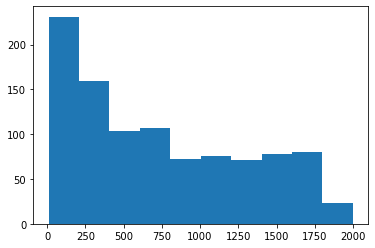

In [96]:
plt.hist(car_path_durations)